# Toxic Comment Classification Challenge | Kaggle

### Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [3]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
# dropping id and comment text
df_toxic = df.drop(['id', 'comment_text'], axis=1)
# calculating total count of each category comments
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'count'])
df_stats

,category,count
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


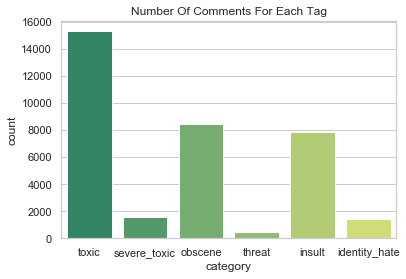

In [5]:
# df_toxic.sum().plot(kind="bar")

sns.set(style="whitegrid")
sns.barplot(x='category', y='count', data=df_stats, palette="summer")
plt.title("Number Of Comments For Each Tag")
plt.show()

> This shows that the number of comments in each category is **extremely unbalanced**. We can further check whether each comment has been tagged or not?

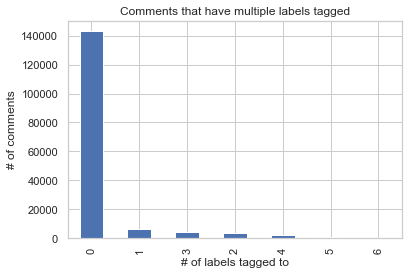

89.83211235124176 % comments have no labels associated to them.


In [6]:
rowsums = df_toxic.iloc[:,:].sum(axis=1)
valcount = rowsums.value_counts()
valcount.plot.bar()
plt.xlabel("# of labels tagged to")
plt.ylabel("# of comments")
plt.title("Comments that have multiple labels tagged")
plt.show()

print(valcount[0]*100/sum(valcount),"% comments have no labels associated to them.")

> This essentially shows that a large amount of the entire dataset is tagged to none of the six labels.

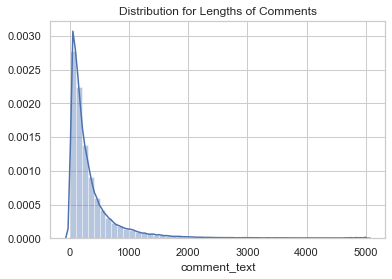

In [7]:
lens = df.comment_text.str.len()
sns.distplot(lens)
plt.title("Distribution for Lengths of Comments")
plt.show()

> This indicates that most of the comments are of lengths less than 500, while some are of length 5000 as well.

In [8]:
print("# Of Vacant Comments : ", df['comment_text'].isnull().sum())

# Of Vacant Comments :  0


In [9]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"